# Problema 2

Considere un oscilador armónico no lineal; e.g., una masa sujeta a un resorte cuya fuerza de restauración no es lineal. Usando este ejemplo como motivación, explique un método Runge-Kutta de orden dos de su preferencia para la integración de ecuaciones diferenciales lineales. Usted tiene la libertad de escoger la forma funcional exacta que prefiera para la fuerza de restitución, siempre y cuando esta sea no lineal. Suponga que los estudiantes saben Python 3 y su librería estándar. Sin embargo, aclare al principio del notebook cuáles conocimientos previos deben tener los estudiantes (por ejemplo, diagonalización, integrales, transformada de Fourier, etc.) para entender los métodos numéricos. Establezca una solución completa y con interpretación física al final de su explicación. En la construcción de su solución puede usar las librerías numpy y scipy teniendo en cuenta que debe explicar su selección de funciones y cómo se relacionan con los métodos explicados.



# Solución

El estudiante debe tener conocimientos previos de integrales, ecuaciones diferenciales, y de la librería numpy.


## Introducción 
Al querer solucionar una ecuación diferencial simple de la forma
$$
\dot x = v(x,t)
$$
donde $x$ es la variable independiente y $v$ es una función de $x$ y $t$, si no conocemos un método de integración para solucionar de manera exacta, podemos implementar métodos que aproximen la solución, por ejemplo si $v$ es suficientemente constante en un intervalo pequeño de tiempo $\Delta t$ podemos aproximar la solución como
$$
x \approx v(x,t) \Delta t + x_0
$$
donde $x_0$ es el valor de $x$ en el tiempo $t_0$. Este método es conocido como método de Euler y es de orden 1, es decir, el error de la aproximación es proporcional a $\Delta t$.

Podemos utilizar de manera iterativa estos métodos para obtener una aproximación a la curva dando pequeños pasos de tiempo $h$,donde ahora en un tiempo final $t_f$ luego de $N$ pasos de tiempo, la aproximación a la solución es
$$
x_N \approx x_0 + \sum_{i=0}^{N-1} v(x_i,t_i) * h
$$
cada vez, el siguiente paso $x_{i+1}$ se calcula a partir del paso anterior $x_i$ y el tiempo $t_i$ como sigue
$$
x_{i+1} = x_i + v(x_i,t_i) * h.
$$
donde la validez de esta aproximación es del orden de $\mathcal O (h)$. Diferentes métodos pueden aproximar de mejor manera el valor de $x_{i+1}$, por ejemplo el método de Runge-Kutta es bastante eficiente en el cálculo de las aproximaciones.  

## Método de Runge Kutta de orden 2
Sin entrar en detalles técnicos, el método de Runge-Kutta es un método numérico utilizado para aproximar soluciones de ecuaciones diferenciales ordinarias (EDOs). En particular, el método de orden 2 de Runge-Kutta es uno de los métodos más simples y ampliamente utilizados en la aproximación de soluciones.

El método de Runge-Kutta de orden 2 se basa en la idea de aproximar la solución de una EDO en un punto utilizando una combinación ponderada de la pendiente en ese punto y la pendiente en un punto vecino. Esta combinación de pendientes nos permite obtener una mejor aproximación de la solución en comparación con otros métodos más simples.



### Derivación del método
Pendiente :)


### Implementación del método
El método de orden $2$ de Runge-Kutta utiliza la siguiente fórmula para calcular la aproximación de la solución en el siguiente punto:
$$
x_{n+1} = x_n + (k_1 + k_2) \frac{h}{2} + \mathcal O (h^3)
$$
donde $h$ es el tamaño del paso en $t$, $x_n$ es la aproximación de la solución en el punto $n$, y $k_1$ y $k_2$ son las pendientes en los puntos $t_n$ y $t_n + h$ respectivamente.
$$
\begin{aligned}
k_1 &= v(x_n, t_n) \\
k_2 &= v(x_n + k_1, t_n + h)
\end{aligned}
$$

**Vemos cómo aplicar esta solución en un problema donde la ecuación diferencial es de orden 2.**

Asumamos un Oscilador Armónico No Lineal con una fuerza de restitución de la forma:
$$
f(x) = -kx(1+\alpha x^2) 
$$
con $k$ y $\alpha$ constantes positivas. Según la segunda ley de Newton la ecuación diferencial que describe el movimiento del sistema es por tanto:
$$
m\ddot{x} = -kx(1+\alpha x^2)
$$


Dado que no podemos integrar diréctamente esta ecuación diferencial de segundo orden, la podemos transformar en un sistema de dos ecuaciones diferenciales de primer orden, definiendo $v = \dot{x}$, entonces
$$
\begin{aligned}
\dot{x} &= v \\
\dot{v} &= -\frac km x(1+\alpha x^2)
\end{aligned}
$$

Definamos estas dos funciones en Python:

In [21]:
m = 1.0 # kg
k = 1.1 # N/m
alpha = 0.05 # N/m^2

def f(x):
    return -k * ( x * (1 - alpha * x**2) )/m 

def next_x_v (x,v, dt):
    # calcula la pendiente en el punto actual
    k1 =  v
    l1 = f(x)

    # calcula la posible pendiente en el punto siguiente
    k2 = (v + 0.5 * l1)
    l2 = f(x + 0.5 * k1)
    
    # calcula el punto siguiente promediando las pendientes
    x_next = x + (k1 + k2)*dt/2
    v_next = v + (l1 + l2)*dt/2
    return x_next, v_next

De esta manera, dadas un conjunto de condiciones iniciales $x_0$ y $v_0$ podemos calcular la solución de la ecuación diferencial en un intervalo de tiempo $[t_0, t_f]$.

In [22]:
x_0 = 1.5 # m
v_0 = 0 # m/s
dt = 0.02 # s
t_0 = 0 # s
t_max = 10 # s

# calcula los puntos
x = [x_0]
v = [v_0]
t = [t_0]
while t[-1] < t_max:
    x_next, v_next = next_x_v(x[-1],v[-1],dt)
    x.append(x_next)
    v.append(v_next)
    t.append(t[-1] + dt)

Grafiquemos usando la librería matplotlib la solución obtenida

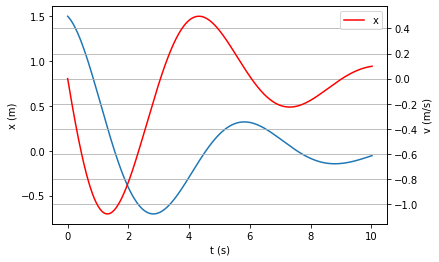

In [24]:
import matplotlib.pyplot as plt
# grafica los puntos para x
plt.plot(t,x)
plt.xlabel('t (s)')
plt.ylabel('x (m)')

# add legend
plt.legend(['x (m)'], loc='lower right')

# add a second y-axis with the velocity:
plt.twinx()
plt.ylabel('v (m/s)')
# grafica los puntos para v
plt.plot(t,v, 'r')

# add legend
plt.legend(['v (m/s)'], loc='upper right')

# add a grid
plt.grid(True)

plt.show()

Con un poco más de tiempo ahondaremos más y expandiremos estas soluciones a sistemas de ecuaciones diferenciales de orden superior.